# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/a-ramji/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====

## Import libraries and functions

In [2]:
# let's start by importing libraries as usual
import os # like here() in R

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends
import matplotlib.lines as mlines # for making our customized marker in the legend
from matplotlib.lines import Line2D  # also for this custom marker 
from matplotlib.markers import MarkerStyle # also for custom markers
from matplotlib.transforms import Affine2D

# for spatial/raster data etc. 
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from shapely.geometry import Polygon # for making our bbox
from shapely.geometry import Point 
from shapely.geometry import box

from rasterio.features import rasterize # for rasterizing polygons
pd.set_option('display.max_columns', None)

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [3]:
# 1: importing the land cover raster file
lulc = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data', 'land_cover.tif'))

lulc.head()

<xarray.DataArray (band: 1, y: 5, x: 5)>
array([[[42, 42, 42, 42, 42],
        [39, 42, 42, 39, 42],
        [39, 39, 39, 39, 42],
        [39, 42, 42, 39, 39],
        [39, 39, 39, 39, 39]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -2.031e+06 -2.031e+06
  * y            (y) float64 1.762e+06 1.762e+06 1.762e+06 1.762e+06 1.762e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

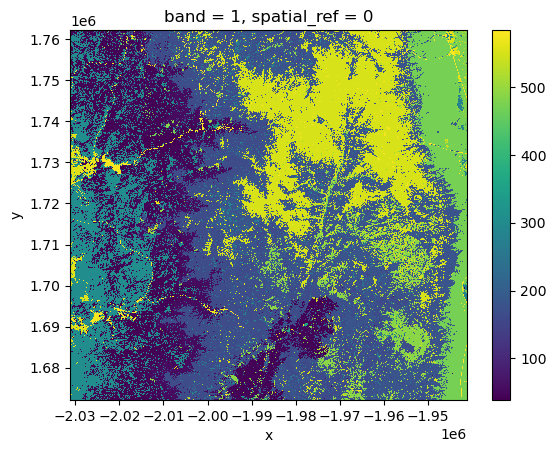

In [4]:
# preliminary plot of lulc raster file
lulc.plot()

In [5]:
lulc.rio.crs

CRS.from_epsg(5070)

In [6]:
# 2: importing the CA shapefile
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')
ca.head()
ca.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
ca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    1 non-null      object  
 1   DIVISION  1 non-null      object  
 2   STATEFP   1 non-null      object  
 3   STATENS   1 non-null      object  
 4   GEOID     1 non-null      object  
 5   STUSPS    1 non-null      object  
 6   NAME      1 non-null      object  
 7   LSAD      1 non-null      object  
 8   MTFCC     1 non-null      object  
 9   FUNCSTAT  1 non-null      object  
 10  ALAND     1 non-null      int64   
 11  AWATER    1 non-null      int64   
 12  INTPTLAT  1 non-null      object  
 13  INTPTLON  1 non-null      object  
 14  geometry  1 non-null      geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 248.0+ bytes


<AxesSubplot:>

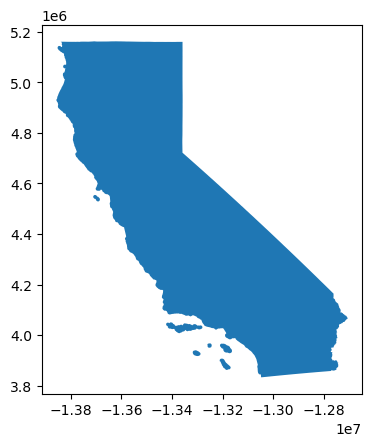

In [8]:
# preliminary plot to take a look at our shapefile (CA)
ca.plot()

## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

In [9]:
# let's check the bounds first 
lulc.rio.bounds()

(-2031135.0, 1672215.0, -1941135.0, 1762215.0)

<AxesSubplot:>

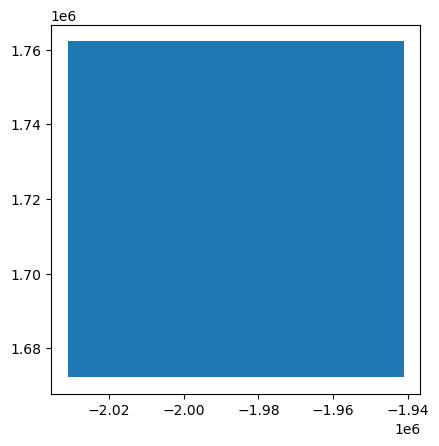

In [10]:
# creating a bounding box from lulc using shapely's box function
bbox = gpd.GeoDataFrame(geometry = [box(*lulc.rio.bounds())],
                 crs = lulc.rio.crs)

# note: we're performing this step BEFORE reprojecting our crs, because if we reproject before making our bounding box, 
# the bounding box of the reprojected raster (lulc) will give a "non-rotated" square with an inaccurate representation
# of our target polygon for this step


# viewing the output of this step to make sure we properly constructed a bounding box
bbox.plot()

In [11]:
# checking the crs 
print(lulc.rio.crs)

EPSG:5070


In [12]:
print(bbox.crs)

PROJCS["NAD83 / Conus Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5070"]]


In [13]:
print(ca.crs)

epsg:3857


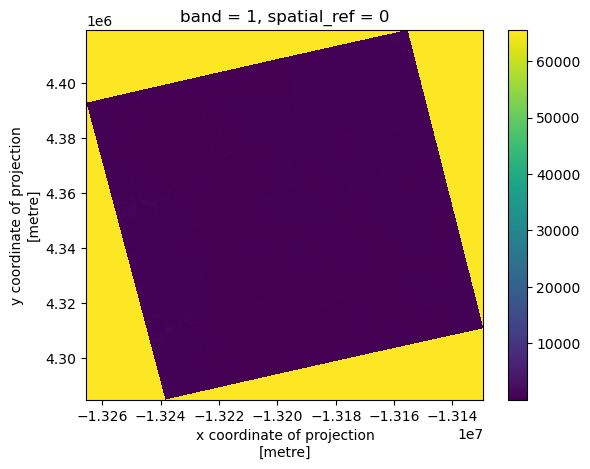

In [14]:
# reprojecting lulc and plotting to get a general idea of what our bounding box 
# should look like after being reprojected
lulc.rio.reproject(ca.crs).plot()

<AxesSubplot:>

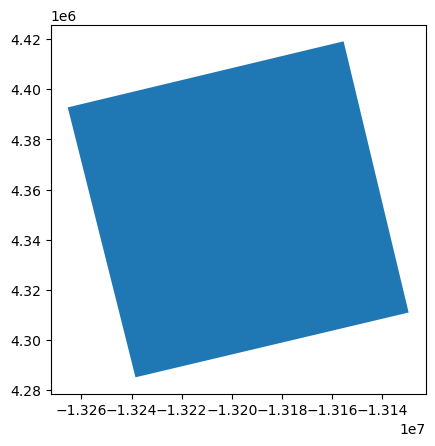

In [15]:
# convert bbox to CA crs and plot
# notice the bbox of the original raster is now rotated in the new crs
bbox_cacrs = bbox.to_crs(ca.crs)

# viewing bbox 
bbox_cacrs.plot()

nice! this looks fairly similar to our lulc reprojected plot. 

In [16]:
# showing the original crs using the rio accessor
print(f"Before update:\n lulc bbox crs {bbox.crs} \nbefore update:\n CA crs {ca.crs}")

# the crs don't match, so let's update that before anything else
# lulc = lulc.rio.reproject(ca.crs)

# after update:
print(f"After update:\n lulc bbox crs {bbox_cacrs.crs} \nAfter update:\n CA crs {ca.crs}")

Before update:
 lulc bbox crs PROJCS["NAD83 / Conus Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5070"]] 
before update:
 CA crs epsg:3857
After update:
 lulc bbox crs epsg:3857 
After update:
 CA crs epsg:3857


## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

note: Mount Whitney's coordinates are 36.5785° N, 118.2923° W
https://www.peakbagger.com/peak.aspx?pid=2829

adjusted to the correct CRS of 3857 using epsg.io's coordinate transformer https://epsg.io/transform#s_srs=4326&t_srs=3857&x=118.2923000&y=36.5785000

- Longitude: 13168238.600765156 °W
- Latitude: 4380516.844251226 °N

In [17]:
# inputting the Mount Whitney coordinates that I found in the same CRS of EPSG 3857
whitney_coords = (-13168238.600765156, # Longitude (x-coord for plotting) 
                  # note: this coordinate is negative because it's West
                  4380516.844251226) #  Latitude (y-coord for plotting), North

# creating a geopandas.GeoDataFrame, using shapely Point and our coordinates
mt_whitney = gpd.GeoDataFrame(geometry=[Point(whitney_coords)],
                             crs = ca.crs) # specifying same CRS (EPSG:3857)
# viewing output
mt_whitney

,geometry
0,POINT (-13168238.601 4380516.844)


In [18]:
mt_whitney.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [19]:
# checking ca column names
ca.columns

# looks like we need to update those!

# making column names lowercase 
ca.columns = ca.columns.str.lower()
print(ca.columns, "\n")

Index(['region', 'division', 'statefp', 'statens', 'geoid', 'stusps', 'name',
       'lsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat', 'intptlon',
       'geometry'],
      dtype='object') 



## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

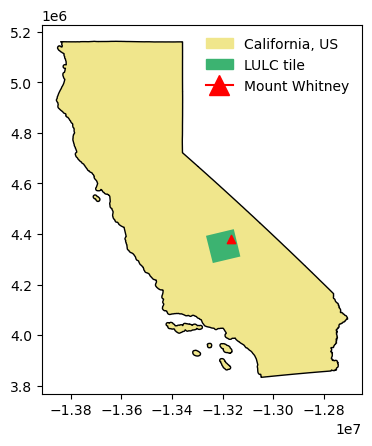

In [20]:
# making our map!

fig, ax = plt.subplots()

# ---------------------------

ca.plot(ax=ax,
        color = "khaki",
        edgecolor="black")

ca_patch = mpatches.Patch(color = "khaki",
                          label = "California, US"
                         )

# --------------------------------------------

bbox_cacrs.plot(ax=ax, color = "mediumseagreen")
bbox_patch = mpatches.Patch(color = "mediumseagreen",
                              label = "LULC tile"
                             )
# --------------------------------------------

mt_whitney.plot(ax=ax, color = "red", marker="^")
# can't use patches for symbols/markers, so we'll use something else from matplotlib
whitney_marker = mlines.Line2D([], [], color='red', marker='^',
                          markersize=15, label='Mount Whitney')

# ---------------------------------------------

# create legend
# frameon is the frame for the legend (default is true)
ax.legend(handles = [ca_patch, bbox_patch, whitney_marker],
          frameon=False, # removing legend frame
          loc='upper right')

# ----------------------------
# save figure (optional)
#plt.savefig('kodiad_area_map.png', bbox_inches='tight',  dpi=100)


plt.show()



## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
